# **Cardiovascular Disease | Exploratory Data Analysis**
<img src="https://www.hhmglobal.com/wp-content/uploads/2020/10/AI_Cardio.jpeg" >

Heart disease (or Cardiovascular disease) is a general term for body conditions affecting the heart or blood vessels. It is one of top 10 global causes of deaths in the world and an estimated 17.9 million people died from cardiovascular disease each year, representing 31% of all global deaths.

## Downloading the Dataset

We will use dataset from Kaggle, Heart Disease UCI. This dataset contains 13 attributes related to heart disease such as chest pain types, blood pressure and cholesterol from 303 patients. We will try to explore this dataset to find insights for heart disease. 

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:

dataset_url = 'https://www.kaggle.com/ronitf/heart-disease-uci' 
import opendatasets as od
od.download(dataset_url)
import warnings
warnings.filterwarnings("ignore")


Skipping, found downloaded files in ".\heart-disease-uci" (use force=True to force download)


In [2]:
#The dataset has been downloaded and extracted.
data_dir = './heart-disease-uci'

In [3]:
import os
os.listdir(data_dir)

['heart.csv']

# Data Preparation and Cleaning
## Description about data columns
1.Age is the age of candidate.

2.Sex has numeric values. 1 denotes male and 0 denotes female.

3.Chest Pain pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.

4.Resting blood pressure is normal pressure with no exercise.

5.Cholesterol means the blockage for blood supply in the blood vessels.

6.Fasting Blood Pressure is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.

7.Rest ECG results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.

8.The Maximum Heart Rate achieved.

9.Exercise induced angina is chest pain while exercising or doing any physical activity.

10.ST Depression is the difference between value of ECG at rest and after exercise.

11.ST Slope is the tangent to the depression value.

12.The number of major blood vessels supplying blood to heart blocked.

13.The Types of thalassemia.

14.Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.


In [4]:
#Load Dataset
import pandas as pd
df=pd.read_csv("heart-disease-uci/heart.csv")

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.shape

(303, 14)

In [10]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see above, this dataset does not have any null or missing value. This time we can skip the data cleaning procedure.

## Exploratory Analysis and Visualization




In [11]:
#Let's begin by importingmatplotlib.pyplot and seaborn.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,4 )
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Target Variable

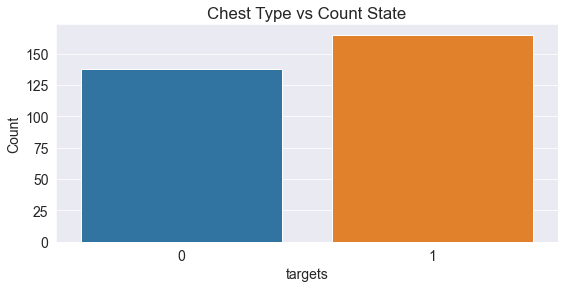

In [12]:
sns.countplot(df.target)
plt.xlabel('targets')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()


In [13]:
result=df.target.value_counts()
#result.index=["heart attack occurs","heart attack didnt occur"]
target_df= pd.DataFrame({"result": ["heart attack occurs","heart attack didnt occur",]
,"count":result.values},index=["1","0"])
target_df
#Most of tumors are diagnosed with Malignant, 54.5% (165 cases). On the other hand, the proportion of Benign in Condition is less than 50%.

,result,count
1,heart attack occurs,165
0,heart attack didnt occur,138


In [14]:
minage= min(df.age)
maxage=max(df.age)
meanage = df.age.mean()
print('Min Age :',minage)
print('Max Age :',maxage)
print('Mean Age :',meanage)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [15]:
young_ages= df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


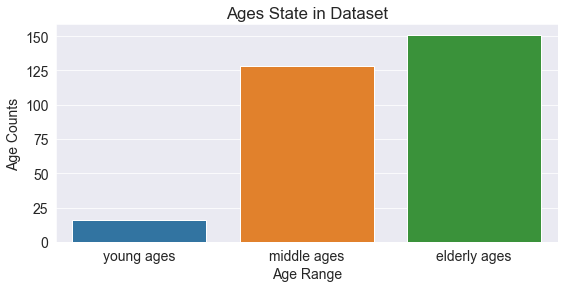

In [16]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [17]:
#As seen, there are 4 types of chest pain.
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

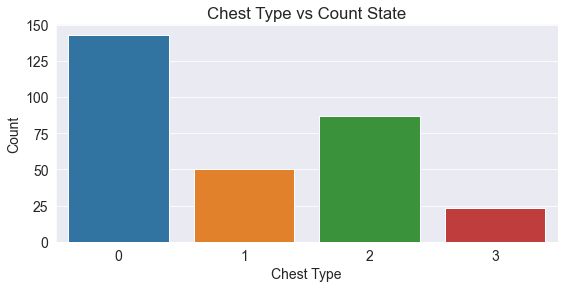

In [18]:
sns.countplot(df.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad


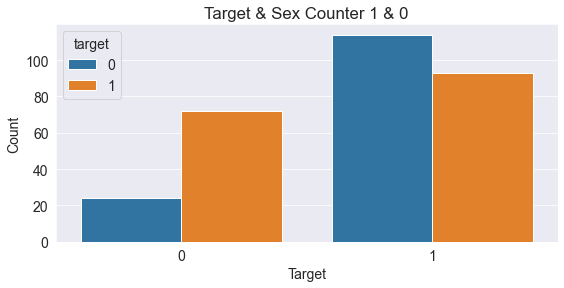

In [19]:
sns.countplot(hue=df.target,x=df.sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

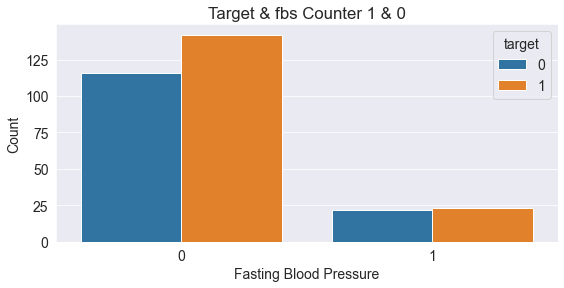

In [20]:
sns.countplot(hue=df.target,x=df.fbs)
plt.xlabel('Fasting Blood Pressure')
plt.ylabel('Count')
plt.title('Target & fbs Counter 1 & 0')
plt.show()
#For the relationship between Fasting blood sugar level and Condition, surprizingly, people who have healthy blood sugar level have Malignant tumors more than people who have too much fasting blood sugar level.

246.26402640264027

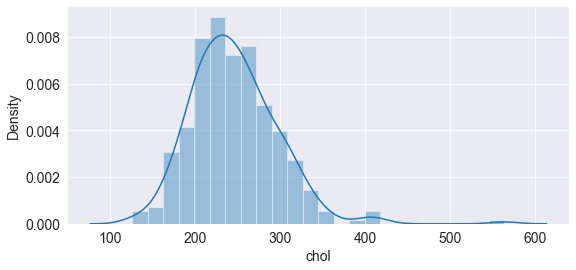

In [21]:
sns.distplot(df['chol'])
df["chol"].mean()
#For both female and male aged 20 and older, the normal range of serum cholesterol is 125-200 mg/dL. 
#The mean of Serum cholesterol fall into high cholesterol level.

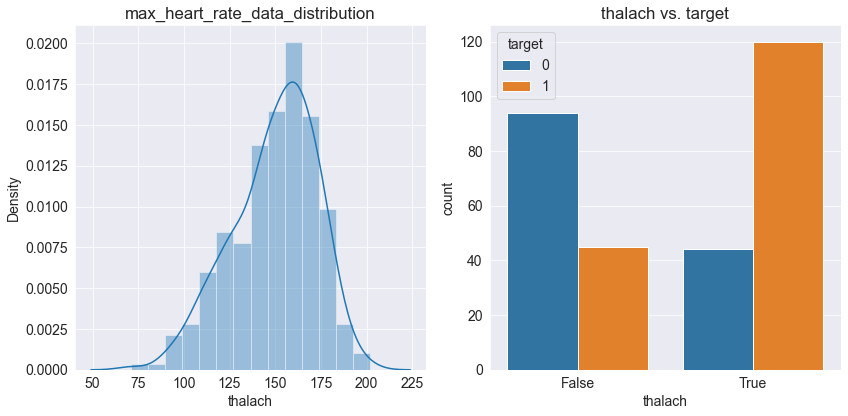

149.64686468646866

In [22]:
def max_heart_rate_analysis():
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df['thalach'])
    plt.title("max_heart_rate_data_distribution")
    plt.subplot(1, 2, 2)
    sns.countplot(x=df.thalach>150,hue=df.target)
    plt.title("thalach vs. target")
    
    plt.tight_layout()
    plt.show()

max_heart_rate_analysis();

df["thalach"].mean()

# observed that greater than 150 of max_heart_rate, there is a high chance of heart attack occuring

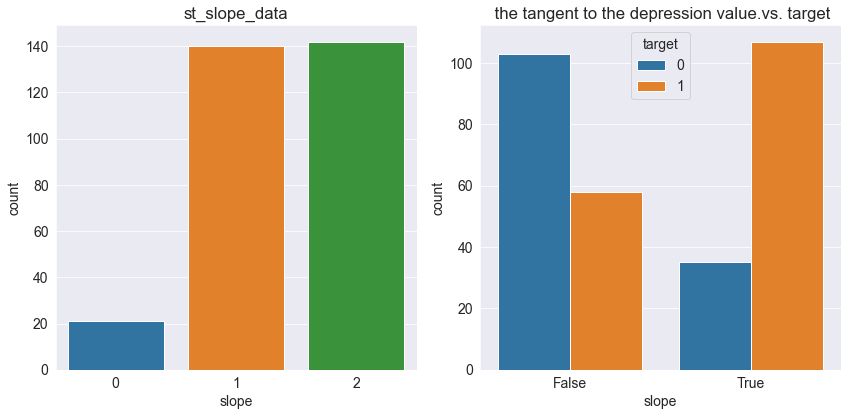

1.3993399339933994

In [23]:
def ST_slope_analysis():
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(df['slope'])
    plt.title("st_slope_data")
    plt.subplot(1, 2, 2)
    sns.countplot(x=df.slope>1.4,hue=df.target)
    plt.title(" the tangent to the depression value.vs. target")
    
    plt.tight_layout()
    plt.show()
ST_slope_analysis();

df["slope"].mean()

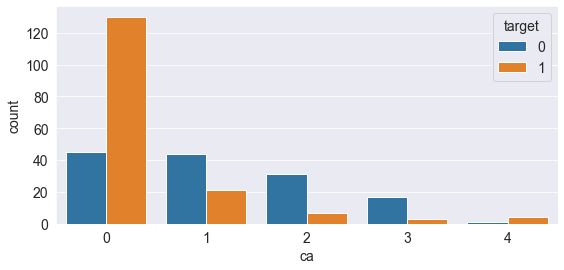

In [24]:
sns.countplot(x="ca",hue="target",data=df)
plt.show();

<AxesSubplot:xlabel='thal', ylabel='count'>

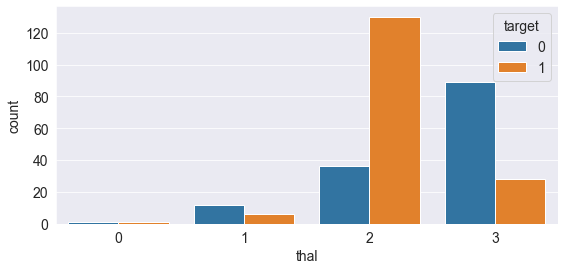

In [25]:
sns.countplot(x="thal",hue="target",data=df)

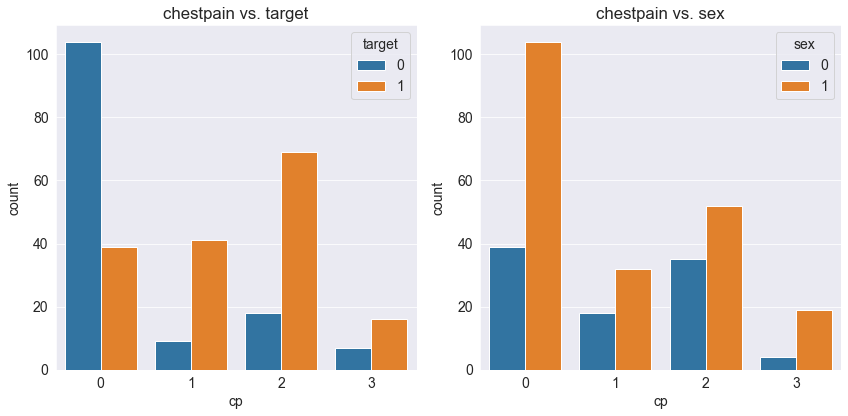

In [26]:
def chestpain_analysis():
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x="cp",hue="target",data=df)
    plt.title("chestpain vs. target")
    plt.subplot(1, 2, 2)
    sns.countplot(x="cp",hue="sex",data=df)
    plt.title("chestpain vs. sex")
    
    plt.tight_layout()
    plt.show()

chestpain_analysis();
    


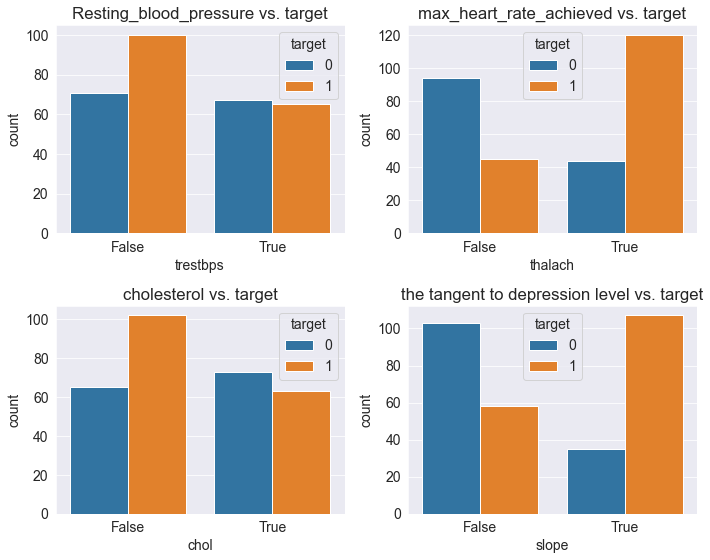

In [27]:
def analysis():
    fig = plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    sns.countplot(x=df.trestbps>131,hue=df.target)
    plt.title("Resting_blood_pressure vs. target")
    plt.subplot(2, 2, 2)
    sns.countplot(x=df.thalach>150,hue=df.target)
    plt.title("max_heart_rate_achieved vs. target")
    plt.subplot(2, 2, 3)
    sns.countplot(x=df.chol>246,hue=df.target)
    plt.title("cholesterol vs. target")
    plt.subplot(2, 2, 4)
    sns.countplot(x=df.slope>1.4,hue=df.target)
    plt.title("the tangent to depression level vs. target")
    
    plt.tight_layout()
    plt.show()

analysis();

## Observations


People over 50 years has more wide range of blood pressure, but it seems that there is no relationship between resting blood pressure and age for condition.
Cholesterol

The higher cholesterol level the middle age population has, the more Malignant condition they have.
Max_heart_rate

The younger population is more likely to have high maximum heart rate and Malignant condition. However, the older age tends to have low maximum heart rate and they have Benign tumors.
ST_depression

In any age, people who have the shallow ST-segment depression are exposed to Malignant.


## Feature vs. Feature for Condition

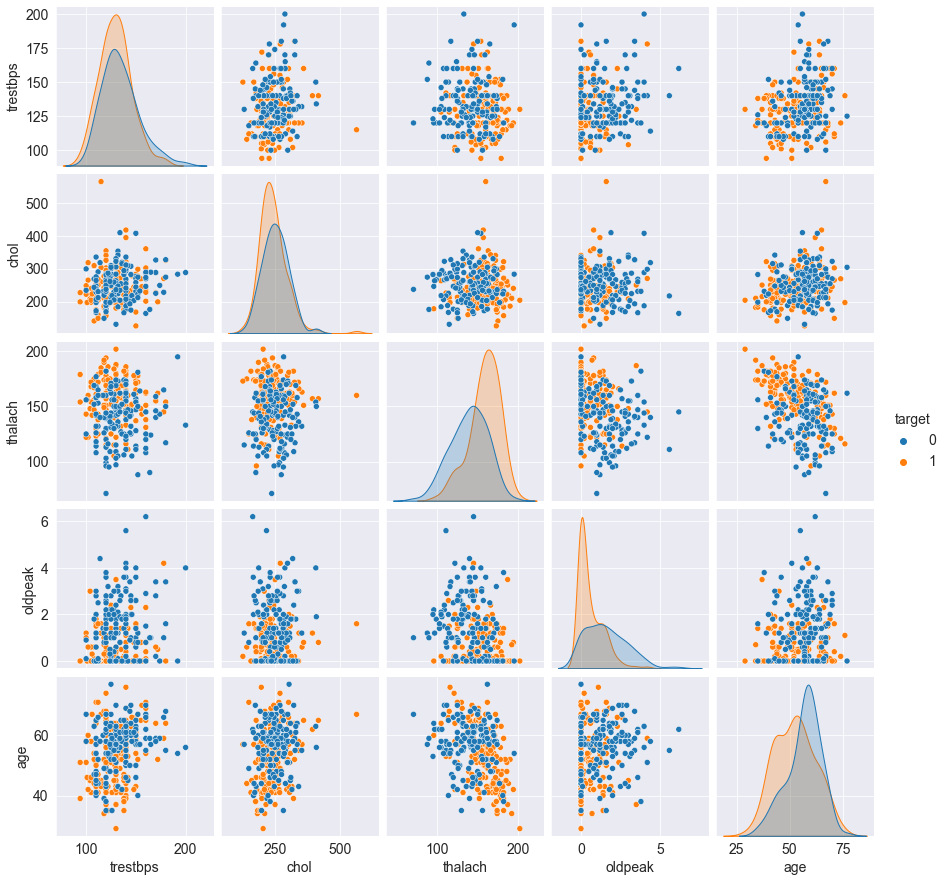

In [28]:
sns.pairplot(df[['trestbps','chol','thalach','oldpeak','age', 'target']],hue='target');

In [29]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2, 
                fmt='.2f', cmap='ocean_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()
    
    
correlation_heatmap(df);

Top correlated variables for Condition following:

Chest_pain_type(cp): 0.43

Max_heart_rate(thalach): 0.42

ST_slope: 0.35